In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy import stats
from my_classifier.my_classifier import my_classifier, my_classifier2

In [3]:
def label_encoding(train, test, cols):
    enc = preprocessing.LabelEncoder()
    data = pd.concat([train, test]).reset_index()
    for c in cols:
        enc.fit(np.unique(data[c]))
        test[c] = enc.transform(test[c])
        train[c] = enc.transform(train[c])
    return train, test

def one_hot_encoding(train, test, cols):
    data = pd.concat([train, test]).reset_index()
    data = pd.get_dummies(data, columns=cols, prefix=cols)
    data.drop('index', axis=1, inplace=True)
    return data.loc[0 : train.shape[0], : ], data.loc[train.shape[0] : train.shape[0]+test.shape[0], : ]

In [4]:
def print_scoring(prediction, testY, name, threshold = 0.5):
    res = prediction >= threshold
    ac = np.sum(res == testY)/testY.shape[0]
    tpr = np.sum(np.logical_and(res == 1, testY == 1))/np.sum(testY == 1)
    fpr = np.sum(np.logical_and(res == 1, testY == 0))/np.sum(testY == 0)
    tnr = np.sum(np.logical_and(res == 0, testY == 0))/np.sum(testY == 0)
    fnr = np.sum(np.logical_and(res == 0, testY == 1))/np.sum(testY == 1)
    print('accuracy', name + ': ', ac)
    print('true-positive-rate: ', tpr)
    print('false-positive-rate: ', fpr)
    print('true-negative-rate: ', tnr)
    print('false-negative-rate: ', fnr)
    print('')


In [7]:
def max_thres(tprs, fprs, thresholds):
    dist = (tprs - fprs)
    return thresholds[dist==np.amax(dist)][0]

def max_j_value(tprs, fprs, thresholds):
    dist = (tprs - fprs)
    return np.amax(dist)
    

In [10]:
#prepare data
test = pd.read_csv('data/adult_test.csv', sep=',', na_values = ['?'])
train = data = pd.read_csv('data/adult_train.csv', sep=',', na_values = ['?'])
train = train.dropna().reset_index(drop=True)

bin_col = ['sex', 'income']
cat_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
train, test = label_encoding(train, test, bin_col)
train, test = one_hot_encoding(train, test, cat_col)

trainX = train.drop(['income', 'fnlwgt'], axis=1)
trainY = train.income
testX = test.drop(['income', 'fnlwgt'], axis=1)
testY = test.income

In [11]:
#train classifiers
clf = DecisionTreeClassifier(max_depth=5).fit(trainX, trainY)
my_clf = my_classifier2().fit(trainX, trainY)

In [12]:
#print interesting scores
print_scoring(clf.predict(testX), testY, 'clf')
print_scoring(my_clf.predict(testX), testY, 'my')

clf 0.840637450199
tpr 0.491621621622
fpr 0.0456866197183
tnr 0.954313380282
fnr 0.508378378378

my 0.754316069057
tpr 0.0
fpr 0.0
tnr 1.0
fnr 1.0



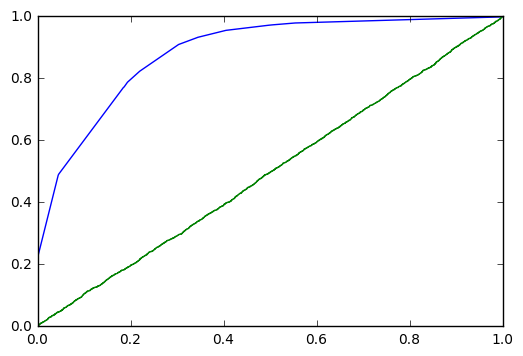

auc:  0.88472845689
my auc:  0.496946445565


In [14]:
#plot roc curve and area-under-curve
roc = roc_curve(testY, clf.predict_proba(testX)[:, 1], pos_label=1)
my_roc = roc_curve(testY, my_clf.predict_proba(testX)[:, 1], pos_label=1)

plt.plot(roc[0], roc[1], 'b-')
plt.plot(my_roc[0], my_roc[1], 'g-')
plt.show()

print('area-under-curve: ', auc(roc[0], roc[1]))
print('my_classifier area-under-curve: : ', auc(my_roc[0], my_roc[1]))

In [16]:
#j-scores
print('max j-score: ', max_j_value(roc[1], roc[0], roc[2]))
print('max j-score my: ', max_j_value(my_roc[1], my_roc[0], my_roc[2]))

max j-score:  0.606202417206
max j-score my:  0.00665350209364


negativ


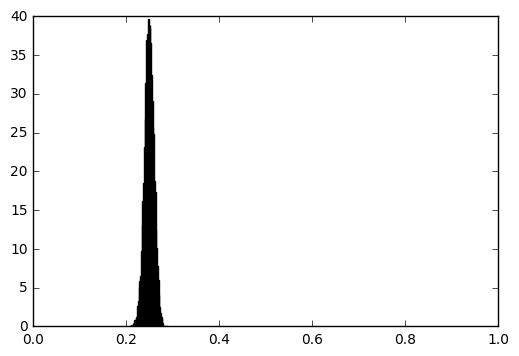

positiv


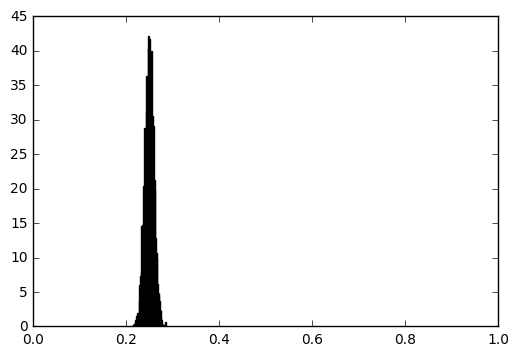

In [18]:
#plot output distribution for negative and positive samples for my_classifier
res = my_clf.predict_proba(testX)[:,1]
res_p = res[np.bool_(testY==1)]
res_n = res[np.bool_(testY==0)]

print('negativ')
plt.hist(x=res_n, bins=50, normed=True)
plt.xlim([0, 1])
plt.show()

print('positiv')
plt.hist(x=res_p, bins=50, normed=1)
plt.xlim([0, 1])
plt.show()

negativ


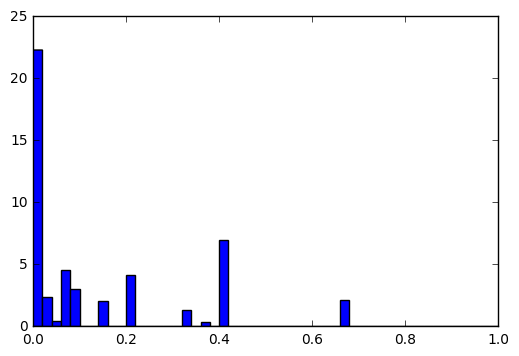

positiv


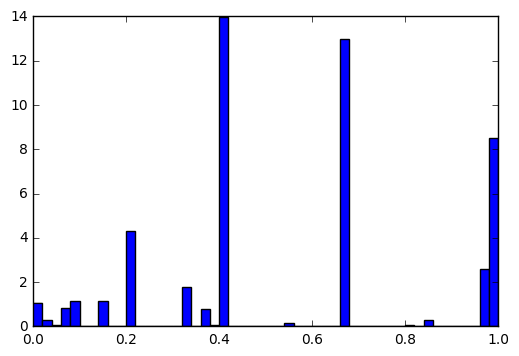

In [15]:
#plot output distribution for negative and positive samples for real classifier
res = clf.predict_proba(testX)[:,1]
res_p = res[np.bool_(testY==1)]
res_n = res[np.bool_(testY==0)]

print('negativ')
plt.hist(x=res_n, bins=50, normed=True)
plt.xlim([0, 1])
plt.show()

print('positiv')
plt.hist(x=res_p, bins=50, normed=True)
plt.xlim([0, 1])
plt.show()